<a href="https://colab.research.google.com/github/angel5877/ml-g03/blob/main/PROYECTO_GRUPO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Crear dataframe a partir de nuestro dataset
df = pd.read_csv('amazon.csv', encoding='ISO-8859-1')
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â¹399,"â¹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â¹199,â¹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â¹199,"â¹1,899",90%,3.9,"7,928",ã Fast Charger& Data Syncã-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
#Data Wrangling
#Paso 1: Cambio de tipo de dato
df['discounted_price'] = df['discounted_price'].str.replace("â¹", "").str.replace(",", "").astype(float) #a) Columna "discounted_price"
df['actual_price'] = df['actual_price'].str.replace("â¹", "").str.replace(",", "").astype(float) #b) Columna "actual_price"

#c) Columna "discount_percentage"
df['discount_percentage'] = df['discount_percentage'].str.replace("%", "").astype(float)
df['discount_percentage'] = df['discount_percentage'] / 100

#d) Columna "rating"
df = df[df['rating'] != '|'].copy() #(1) Eliminar la fila donde el rating es "|""
df['rating'] = df['rating'].astype(float) #(2) Cambiar tipo de dato

df['rating_count'] = df['rating_count'].str.replace(",", "").astype(float) #e) Columna "rating_count"
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,ã Fast Charger& Data Syncã-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


**Nueva variable "flag_exitoso"**


*   Definir el umbral de éxito (Ver histogramas; comparar contra otras variables)
*   Crear la variable según criterios definidos



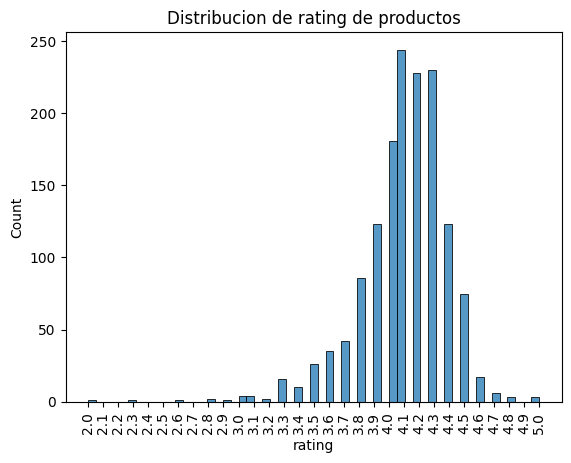

In [ ]:
#EDA
sns.histplot(df['rating'])
plt.title("Distribucion de rating de productos")
plt.xticks(np.arange(2.0, 5.1, 0.1), rotation=90)
plt.show()

In [ ]:
#Distribución en el rango de mayor concentración
bins = np.arange(df['rating'].min(), df['rating'].max() + 0.1, 0.1)
rating_ranges = pd.cut(df['rating'], bins=bins)

conteo = rating_ranges.value_counts().sort_index()
print(conteo)

rating
(2.0, 2.1]      0
(2.1, 2.2]      0
(2.2, 2.3]      1
(2.3, 2.4]      0
(2.4, 2.5]      0
(2.5, 2.6]      1
(2.6, 2.7]      0
(2.7, 2.8]      2
(2.8, 2.9]      1
(2.9, 3.0]      4
(3.0, 3.1]      4
(3.1, 3.2]      2
(3.2, 3.3]     16
(3.3, 3.4]     10
(3.4, 3.5]     26
(3.5, 3.6]     35
(3.6, 3.7]     42
(3.7, 3.8]     86
(3.8, 3.9]    123
(3.9, 4.0]    181
(4.0, 4.1]    244
(4.1, 4.2]    228
(4.2, 4.3]    230
(4.3, 4.4]    123
(4.4, 4.5]     75
(4.5, 4.6]     17
(4.6, 4.7]      6
(4.7, 4.8]      3
(4.8, 4.9]      0
(4.9, 5.0]      3
Name: count, dtype: int64


In [ ]:
#Crear columna "flag_exitoso"
umbral_rating = 4.0
df['flag_exitoso'] = (df['rating'] >= umbral_rating).astype(int)

In [ ]:
#Crear columna "precio_rating"
df['precio_rating'] = df['discounted_price'] / df['rating']

In [ ]:
#Crear columna "flag_descuento"
df['flag_descuento'] = (df['discounted_price'] < df['actual_price']).astype(int)

**Nueva variable "grupos_precio"**


*   Definir los rangos de precios (Ver histograma)
*   Crear la variable según rangos definidos


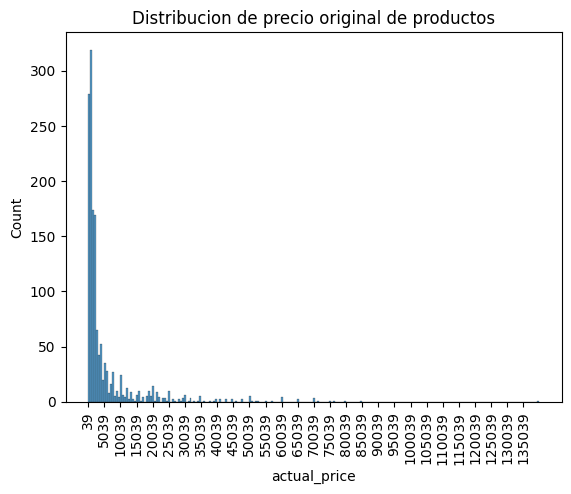

In [ ]:
#EDA
sns.histplot(df['actual_price'])
plt.title("Distribucion de precio original de productos")
plt.xticks(np.arange(39.0, 139900.0, 5000), rotation=90)
plt.show()

In [ ]:
#Crear columna "grupos_precio"
bins = [0, 1000, 10000, 45000, df['actual_price'].max()]
labels = ['Económico', 'Medio', 'Alto', 'Premium']

df['grupos_precio'] = pd.cut(df['actual_price'], bins=bins, labels=labels)

In [ ]:
#Crear columna "nro_grupos_precio"
mapa_valores = {
    'Económico': 1,
    'Medio': 2,
    'Alto': 3,
    'Premium': 4
}

df['nro_grupo_precio'] = df['grupos_precio'].map(mapa_valores).astype(int)

**Nuevas variables con análisis de sentimientos**


*   Se crea función preprocess_text para reprocesar texto y crear uno nuevo
*   Se crea función get_sentiment para devolver un valor en base al nuevo texto

In [ ]:
!pip install emoji
import emoji
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess_text(text):

  # Paso 1: convertir a minusculas
  text = text.lower()

  # Paso 2: de-emojizar
  text = emoji.demojize(text, delimiters=(" ", " ")).replace("_", " ")

  # Paso 3: remover hashtags, URLs, etiquetas (Expresiones Regulares)
  text = re.sub(r'@\w+|#\w+|http\S+|www\S+|https\S+', '', text)

  # Paso 4: Tokenizacion
  tokens = word_tokenize(text)

  # Paso 5: Remover palabras no alfabeticas (signos de puntuacion, palabras con numeros)
  tokens = [word for word in tokens if word.isalpha()]

  # Paso 6: Remover los stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  # Paso 7: Lematizacion
  lemmatizer = WordNetLemmatizer()
  tokens = list(set([lemmatizer.lemmatize(word) for word in tokens]))

  # Paso Final: Unir los tokens para formar un nuevo texto (ya procesado)
  processed_text = ' '.join(tokens)

  return processed_text

In [ ]:
from textblob import TextBlob

# Calcular la polaridad del sentimiento
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Rango: -1 (negativo) a 1 (positivo)

    if polarity > 0.1:
        return 'positivo'
    elif polarity < -0.1:
        return 'negativo'
    else:
        return 'neutral'

In [ ]:
df['emocion_title_cat'] = df['review_title'].apply(lambda x: get_sentiment(preprocess_text(x)))
df['emocion_content_cat'] = df['review_content'].apply(lambda x: get_sentiment(preprocess_text(x)))

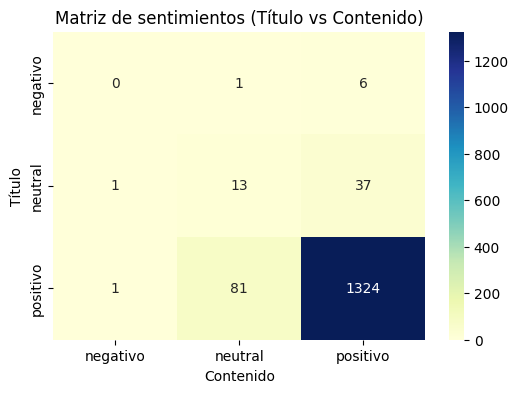

In [ ]:
#Matriz de analisis de sentimientos (título vs contenido)
matriz_sentimientos = pd.crosstab(df['emocion_title_cat'], df['emocion_content_cat'])

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_sentimientos, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Matriz de sentimientos (Título vs Contenido)")
plt.xlabel("Contenido")
plt.ylabel("Título")
plt.show()

In [ ]:
#Crear columnas numéricas de puntajes de emociones
mapa_valores = {
    'positivo': 4,
    'neutral': 2,
    'negativo': 0
}

df['emocion_content'] = df['emocion_content_cat'].map(mapa_valores).astype(int)
df['emocion_title'] = df['emocion_title_cat'].map(mapa_valores).astype(int)

In [ ]:
#Crear columna "puntaje_emocion"
df['puntaje_emocion'] = df['emocion_content'] + df['emocion_title']*0.5

**Nuevas variables considerando categorias**
1.   Separar categorias y encontrar valores únicos
2.   Agrupar las categorias en familias
3.   Marcar una categoría como 1 si el producto pertecene al menos una categoria de la familia sino 0


In [ ]:
# Dividir las categorías múltiples separadas por "|"
all_categorias = df['category'].dropna().str.split('|').explode().str.strip()

# Obtener valores únicos
categorias_unicas = all_categorias.unique()

# Crear el DataFrame
df_categorias = pd.DataFrame({'categoria': categorias_unicas})

df_categorias.info() #317 Categorias únicas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   categoria  317 non-null    object
dtypes: object(1)
memory usage: 2.6+ KB


In [ ]:
#Buscar una parte del texto en la columna categoria
df_categorias[df_categorias['categoria'].str.lower().str.contains('home')]

,categoria
9,"HomeTheater,TV&Video"
19,HomeAudio
93,Home&Kitchen
163,HomeImprovement
213,Kitchen&HomeAppliances
241,HomeStorage&Organization
289,HomeMedicalSupplies&Equipment


In [ ]:
# Diccionario de palabras clave por familia
familias_dict = {
    'audio': ['speaker', 'audio', 'head', 'ear', 'soundbar'],
    'computo': ['laptop', 'keyboard', 'mouse', 'tablet', 'monitor', 'usb', 'printer'],
    'movil': ['mobile', 'smartphone', 'charger', 'phone'],
    'hogar': ['home', 'fan', 'heater', 'kitchen', 'appliance', 'irons', 'laundry', 'juicer'],
    'video': ['tv', 'television', 'projector'],
    'almacenamiento': ['memory', 'ssd', 'hard', 'pendrive'],
    'oficina': ['pen', 'paper', 'notebook', 'stationery'],
    'fotografia': ['camera', 'tripod', 'photo'],
    'automovil': ['automobile', 'car'],
    'otros': []  # Lo que no cae en ninguna
}

# Asignar familia a cada categoría
def asignar_familia(cat):
    cat_lower = cat.lower()
    for familia, keywords in familias_dict.items():
        if any(palabra in cat_lower for palabra in keywords):
            return familia
    return 'otros'

In [ ]:
# Primero, limpiar columna 'category'
df['category'] = df['category'].fillna('').astype(str)

# Para cada familia, crear una columna binaria
for familia in familias_dict.keys():
    df[familia] = df['category'].apply(
        lambda x: int(any(asignar_familia(cat.strip()) == familia for cat in x.split('|')))
    )

In [ ]:
#Distribucion por familia
print(df[[*familias_dict.keys()]].sum())

audio              169
computo            386
movil              180
hogar              612
video               78
almacenamiento      37
oficina             73
fotografia          26
automovil           33
otros             1420
dtype: int64


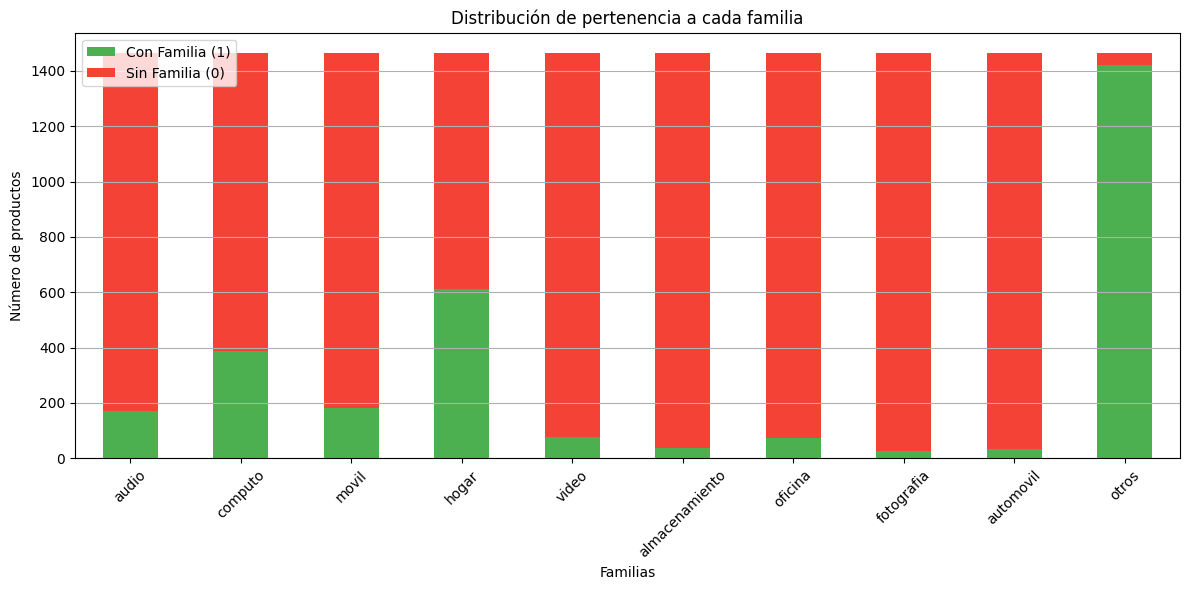

In [ ]:
# Lista de columnas binarias que ya tienes
familias = ['audio', 'computo', 'movil', 'hogar', 'video',
            'almacenamiento', 'oficina', 'fotografia', 'automovil', 'otros']

# Crear un DataFrame con conteo de 1s y 0s por cada familia
conteo_1s = df[familias].sum()
conteo_0s = len(df) - conteo_1s

conteo_binario = pd.DataFrame({
    'Con Familia (1)': conteo_1s,
    'Sin Familia (0)': conteo_0s
}, index=familias)

# Graficar
conteo_binario.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#4CAF50', '#F44336'])
plt.title("Distribución de pertenencia a cada familia")
plt.ylabel("Número de productos")
plt.xlabel("Familias")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,audio,computo,movil,hogar,video,almacenamiento,oficina,fotografia,automovil,otros
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,0,1,0,0,0,0,0,0,0,1
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,0,1,0,0,0,0,0,0,0,1
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,ã Fast Charger& Data Syncã-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,0,1,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           1464 non-null   object  
 1   product_name         1464 non-null   object  
 2   category             1464 non-null   object  
 3   discounted_price     1464 non-null   float64 
 4   actual_price         1464 non-null   float64 
 5   discount_percentage  1464 non-null   float64 
 6   rating               1464 non-null   float64 
 7   rating_count         1462 non-null   float64 
 8   about_product        1464 non-null   object  
 9   user_id              1464 non-null   object  
 10  user_name            1464 non-null   object  
 11  review_id            1464 non-null   object  
 12  review_title         1464 non-null   object  
 13  review_content       1464 non-null   object  
 14  img_link             1464 non-null   object  
 15  product_link         1464 

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,flag_exitoso,precio_rating,flag_descuento,nro_grupo_precio,emocion_content,...,audio,computo,movil,hogar,video,almacenamiento,oficina,fotografia,automovil,otros
count,1464.000000,1464.000000,1464.000000,1464.000000,1462.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,...,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,3126.011906,5447.002923,0.477131,4.096585,18307.376881,0.758197,751.048992,0.967213,1.778689,3.864754,...,0.115437,0.263661,0.122951,0.418033,0.053279,0.025273,0.049863,0.017760,0.022541,0.969945
std,6946.625442,10878.270001,0.216274,0.291674,42766.096572,0.428322,1634.398822,0.178139,0.712305,0.513137,...,0.319658,0.440768,0.328493,0.493404,0.224665,0.157007,0.217737,0.132121,0.148486,0.170796
min,39.000000,39.000000,0.000000,2.000000,2.000000,0.000000,10.263158,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,323.750000,800.000000,0.320000,4.000000,1191.500000,1.000000,78.367117,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000,1.000000,199.732143,1.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1999.000000,4303.750000,0.630000,4.300000,17342.250000,1.000000,498.055556,1.000000,2.000000,4.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000,1.000000,16593.617021,1.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


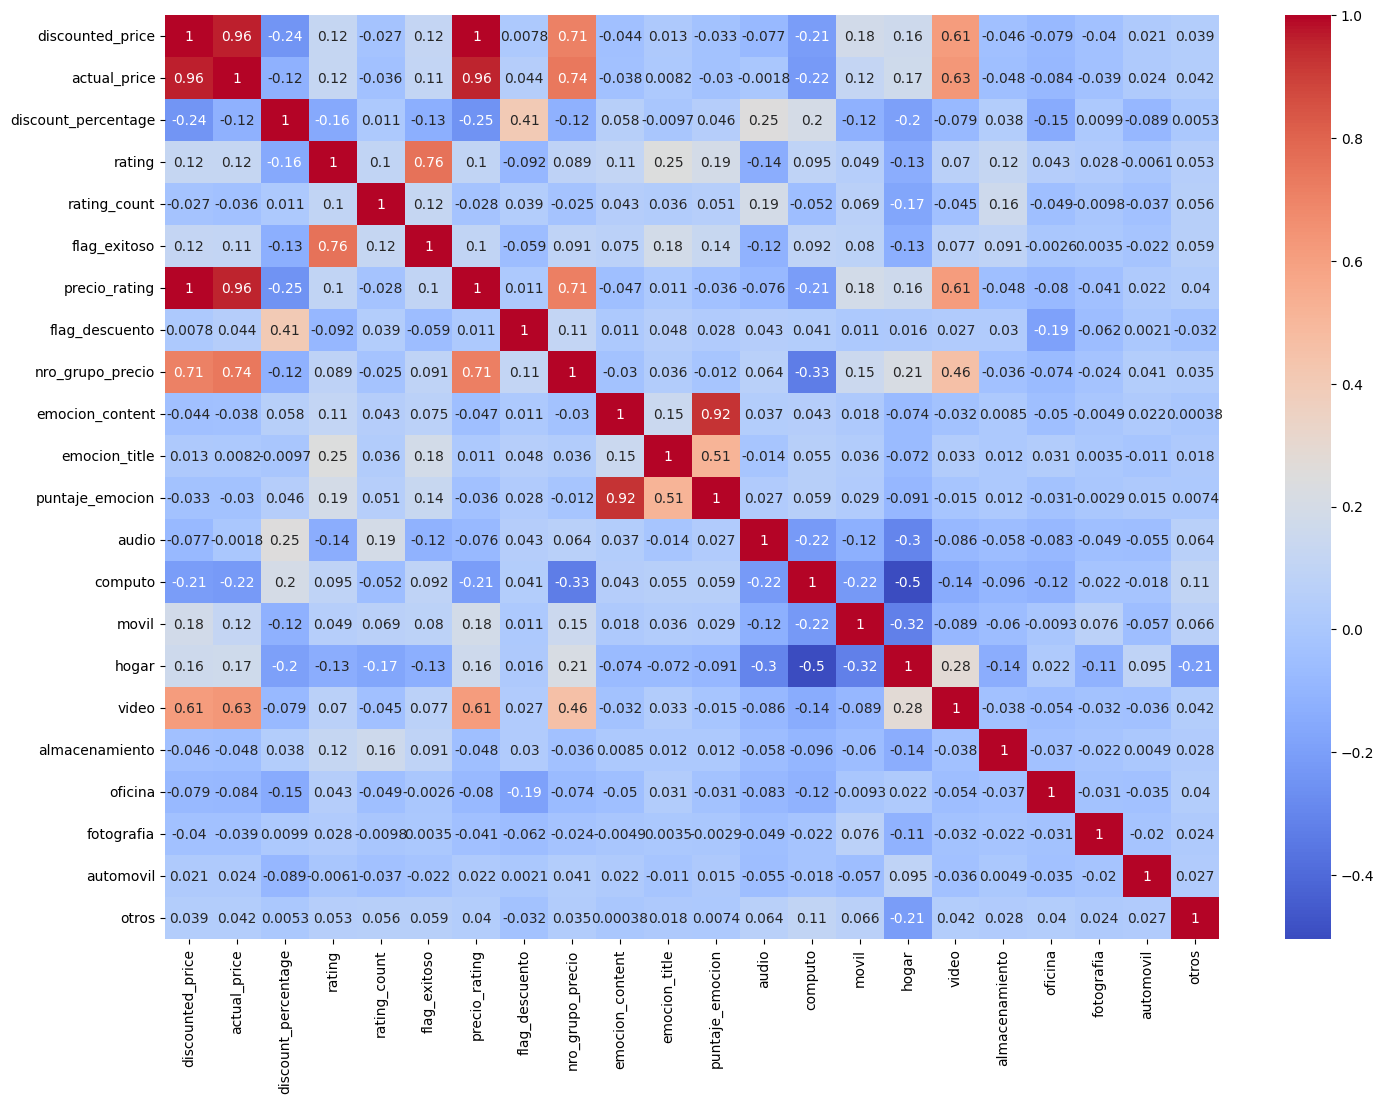

NameError: name 'os' is not defined

In [ ]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()




In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'flag_exitoso',
       'precio_rating', 'flag_descuento', 'grupos_precio', 'nro_grupo_precio',
       'emocion_title_cat', 'emocion_content_cat', 'emocion_content',
       'emocion_title', 'puntaje_emocion', 'audio', 'computo', 'movil',
       'hogar', 'video', 'almacenamiento', 'oficina', 'fotografia',
       'automovil', 'otros'],
      dtype='object')

In [ ]:
#---------------------///<-REGRESCION LINIAL->//---------------------


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Variables
X = df[['discounted_price', 'precio_rating', 'nro_grupo_precio', 'video']]
y = df['actual_price']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Diccionario de modelos de regresión
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor()
}

# Entrenar y guardar
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{nombre}: MAE={mae:.2f}, R²={r2:.2f}")
    joblib.dump(modelo, f"modelo_regresion_{nombre}.pkl")

# Linear Regression
# Idea: Encuentra la línea recta (o hiperplano) que mejor se ajusta a los datos.
# Ejemplo: Predecir el actual_price como una combinación lineal de los inputs.
# Ventaja: Rápida, interpretable, útil si los datos tienen una relación lineal.
# Desventaja: No funciona bien si hay relaciones no lineales o outliers.

# Ridge Regression
# Idea: Igual que regresión lineal, pero con penalización para evitar sobreajuste.
# Ejemplo: Similar a Linear, pero intenta mantener los coeficientes pequeños.
# Ventaja: Maneja multicolinealidad mejor que LinearRegression.
# Desventaja: Requiere ajustar un parámetro (α).

# Lasso Regression
# Idea: Como Ridge, pero además puede eliminar completamente variables poco importantes.
# Ejemplo: Si una variable aporta poco, su coeficiente se convierte en 0.
# Ventaja: Hace selección automática de variables.
# Desventaja: Puede eliminar variables importantes si no se ajusta bien α.

# K-Nearest Neighbors Regressor (KNN)
# Idea: Predice el valor promedio de los K puntos más cercanos.
# Ejemplo: Si 5 productos parecidos costaron €100, el tuyo costará €100 también.
# Ventaja: No necesita suposición sobre la forma del modelo.
# Desventaja: Lento con muchos datos. Sensible a la escala de las variables.

# Random Forest Regressor
# Idea: Crea muchos árboles y promedia sus predicciones.
# Ejemplo: Cada árbol hace una predicción de precio, y se promedian.
# Ventaja: Muy potente, maneja relaciones no lineales y variables mixtas.
# Desventaja: Más lento. Difícil de interpretar.

# Gradient Boosting Regressor
# Idea: Entrena árboles en secuencia, corrigiendo errores del anterior.
# Ejemplo: Si un árbol falla en predicción, el siguiente se especializa en ese error.
# Ventaja: Alta precisión, ideal para datos complejos.
# Desventaja: Entrenamiento más lento. Requiere afinar hiperparámetros.


LinearRegression: MAE=1273.96, R²=0.95
Ridge: MAE=1272.52, R²=0.95
Lasso: MAE=1260.68, R²=0.95
KNN: MAE=1089.41, R²=0.94


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.725e+09, tolerance: 1.500e+07
  model = cd_fast.enet_coordinate_descent(


RandomForest: MAE=764.30, R²=0.98
GradientBoosting: MAE=834.70, R²=0.97


LinearRegression  :	Buen ajuste global (R²=0.95), pero con errores altos (MAE > 1270).

Ridge : Similar a Linear, regularización no mejora significativamente.

Lasso	: Ligera mejora en MAE, pero sin impacto relevante. Requiere ajuste.

KNN	: Menor MAE que los lineales, pero R² más bajo. Sensible a escalado.

RandomForest:  Mejor desempeño general, bajo MAE (739.12) y alto R² (0.98).

GradientBoosting : 	Modelo alta precisión y estabilidad (MAE = 843.58, R² = 0.97).


Random Forest Regressor es el modelo más adecuado para predecir el precio real en este contexto, al ofrecer la mejor combinación entre precisión (MAE más bajo) y ajuste (R² más alto).
Gradient Boosting es una segunda opción sólida.
Los modelos lineales resultan aceptables pero menos efectivos.

In [ ]:
# Diccionario para acceder por nombre
modelos_disponibles = {
    "LinearRegression": "modelo_regresion_LinearRegression.pkl",
    "Ridge": "modelo_regresion_Ridge.pkl",
    "Lasso": "modelo_regresion_Lasso.pkl",
    "KNN": "modelo_regresion_KNN.pkl",
    "RandomForest": "modelo_regresion_RandomForest.pkl",
    "GradientBoosting": "modelo_regresion_GradientBoosting.pkl"
}


In [ ]:
import pandas as pd
import joblib

def predecir_precio(modelo_nombre, discounted_price, precio_rating, nro_grupo_precio, video):
    modelo_path = modelos_disponibles[modelo_nombre]
    modelo = joblib.load(modelo_path)

    entrada = pd.DataFrame([[discounted_price, precio_rating, nro_grupo_precio, video]],
                           columns=["discounted_price", "precio_rating", "nro_grupo_precio", "video"])

    pred = modelo.predict(entrada)[0]
    pred = max(0, pred)

    return f"💰 Precio real estimado con {modelo_nombre}: €{round(pred, 2)}"


In [ ]:
import gradio as gr

interfaz = gr.Interface(
    fn=predecir_precio,
    inputs=[
        gr.Dropdown(list(modelos_disponibles.keys()), label="Modelo de Regresión"),
        gr.Number(label="Precio con Descuento (€)"),
        gr.Number(label="Calificación del Precio"),
        gr.Number(label="Grupo Precio"),
        gr.Number(label="¿Tiene Video? (0 o 1)")
    ],
    outputs="text",
    title="Predicción del Precio Real"
)

interfaz.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://23c235a4e589e3172f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
#---------------------///<-CLASIFICACION->//---------------------

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

# Entradas y salidas
X1 = df[['puntaje_emocion', 'rating', 'emocion_title', 'hogar']]
y1 = df['flag_exitoso']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.15, random_state=42)

# Diccionario de modelos
modelos = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Entrenar y guardar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    acc = accuracy_score(y_test, modelo.predict(X_test))
    print(f"{nombre}: Accuracy = {acc:.4f}")
    joblib.dump(modelo, f"modelo_{nombre}.pkl")


# K-Nearest Neighbors (KNN)
# Idea: Clasifica un punto según las clases más cercanas (vecinos).
# Ejemplo: Si 4 de tus 5 vecinos son "Exitosos", tú también lo serás.
# Ventaja: Simple, no necesita entrenamiento real.
# Desventaja: Lento si hay muchos datos. Sensible a escala de las variables.

# Support Vector Machine (SVM)
# Idea: Encuentra la frontera que mejor separa las clases (maximiza el margen).
# Ejemplo: Separa con una línea o curva los puntos "éxito" y "fracaso".
# Ventaja: Muy precisa en datasets pequeños y con clases separables.
# Desventaja: No funciona tan bien con mucho ruido o clases mezcladas.

# Random Forest
# Idea: Usa muchos árboles de decisión y promedia sus votos.
# Ejemplo: Si la mayoría de los árboles dicen “éxito”, el resultado es “éxito”.
# Ventaja: Muy robusto, maneja bien datos desbalanceados.
# Desventaja: Modelo pesado. Difícil de interpretar.

# Logistic Regression
# Idea: Predice la probabilidad de que algo pertenezca a una clase.
# Ejemplo: “Hay 92% de probabilidad que este producto sea exitoso”.
# Ventaja: Muy rápida, fácil de interpretar.
# Desventaja: Solo modela relaciones lineales.

# Decision Tree
# Idea: Clasifica haciendo preguntas tipo “¿rating > 4.5?”, etc.
# Ejemplo: Como un diagrama de decisiones: sí/no en cada nodo.
# Ventaja: Muy interpretable, se puede visualizar.
# Desventaja: Se sobreajusta fácilmente (overfitting).


# Gradient Boosting
# Idea: Construye modelos débiles en secuencia, cada uno corrigiendo al anterior.
# Ejemplo: Primer modelo falla, segundo se enfoca en esos errores, y así.
# Ventaja: Muy potente, funciona bien en competiciones.
# Desventaja: Lento de entrenar, sensible a ruido si no se ajusta bien.


KNN: Accuracy = 0.9955
SVM: Accuracy = 0.9045
RandomForest: Accuracy = 1.0000
LogisticRegression: Accuracy = 0.9955
DecisionTree: Accuracy = 1.0000
GradientBoosting: Accuracy = 1.0000


KNN	: Muy alto desempeño (Accuracy = 99.55%), buen ajuste en datos cercanos.
SVM : Buen desempeño (90.45%), pero el más bajo del grupo; posible subajuste.
RandomForest: Buena clasificación (Accuracy = 100%), altamente robusto.
LogisticRegression:	Precisión perfecta (100%), modelo lineal eficaz para este conjunto.
DecisionTree:	Perfecto en entrenamiento (100%), pero puede sobreajustar.
GradientBoosting:	También perfecto (100%), excelente generalización si hay validación cruzada.

In [ ]:
joblib.dump(modelo, f"modelo_{nombre}.pkl")

['modelo_GradientBoosting.pkl']

In [ ]:
import joblib
import pandas as pd

# Lista de modelos disponibles
modelos_disponibles = {
    "KNN": "modelo_KNN.pkl",
    "SVM": "modelo_SVM.pkl",
    "RandomForest": "modelo_RandomForest.pkl",
    "LogisticRegression": "modelo_LogisticRegression.pkl",
    "DecisionTree": "modelo_DecisionTree.pkl",
    "GradientBoosting": "modelo_GradientBoosting.pkl"
}

# Función que realiza la predicción con el modelo seleccionado
def predecir_producto(entrada, modelo, modelo_nombre):
    pred = modelo.predict(entrada)[0]

    if pred == 0:
        mensaje = 'Producto no exitoso'
    elif pred == 1:
        mensaje = 'Producto exitoso'
    else:
        mensaje = f'clase desconocida: {pred}'

    return f"Clase predicha con {modelo_nombre}: {mensaje}"

# Función principal que une todo
def predecir_flag_con_modelo(modelo_nombre, puntaje_emocion, rating, emocion_title, hogar):
    archivo = modelos_disponibles.get(modelo_nombre)

    if archivo is None:
        return f"Modelo '{modelo_nombre}' no encontrado."

    modelo = joblib.load(archivo)

    entrada = pd.DataFrame([[puntaje_emocion, rating, emocion_title, hogar]],
                           columns=["puntaje_emocion", "rating", "emocion_title", "hogar"])

    return predecir_producto(entrada, modelo, modelo_nombre)





In [ ]:
import gradio as gr

interfaz = gr.Interface(
    fn=predecir_flag_con_modelo,
    inputs=[
        gr.Dropdown(list(modelos_disponibles.keys()), label="Modelo a usar"),
        gr.Number(label="Puntaje de emoción"),
        gr.Number(label="Rating"),
        gr.Number(label="Título emoción (codificado)"),
        gr.Number(label="Hogar (0 o 1)")
    ],
    outputs="text",
    title="Comparador de Modelos de Clasificación"
)

interfaz.launch()
# Si es 1 producto existos
# si es 0 producto no exitoso

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://05323804a60558827f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
